In simple linear regression one variable is dependent/response variable we can call and one is independent.
In multiple linear regression one is dependent and many are independent variables

# Step 1 : understanding the dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# let's inspect the various aspects of our dataframe

In [4]:
#to check the dimension of the data
advertising.shape

(200, 4)

In [5]:
#to check the info about the data
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
#summary statistics of a dataset
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
#to check the null value in dataset
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# step 2: visualizing the data
let us visualize the data using seaborn.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='TV', ylabel='Sales'>

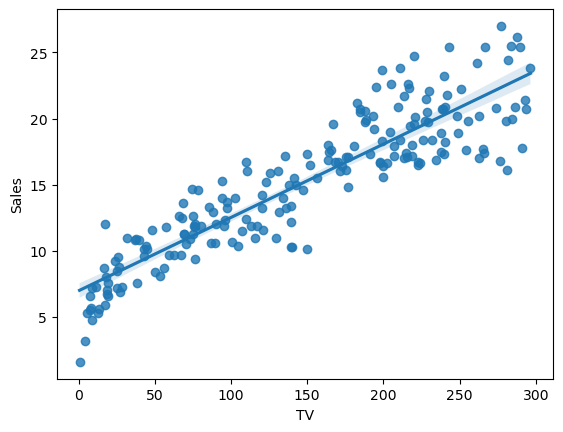

In [9]:
sns.regplot(data=advertising, x = "TV", y = "Sales")
#the blue line shows best fit line
#regression line
#blue dots are actual data points
#the blue line is also a predicted line which goes through max observations.

<Axes: xlabel='Radio', ylabel='Sales'>

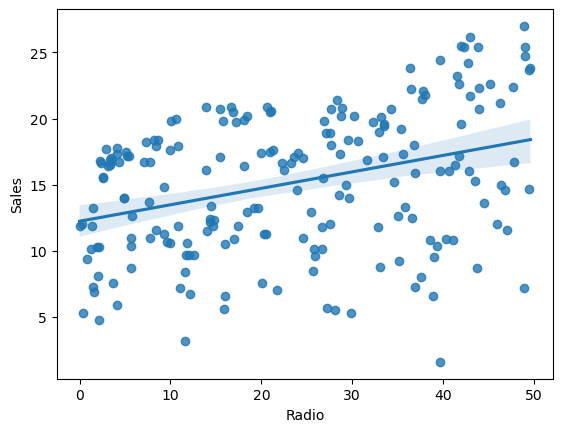

In [10]:
sns.regplot(data=advertising, x = "Radio", y = "Sales")

<Axes: xlabel='Newspaper', ylabel='Sales'>

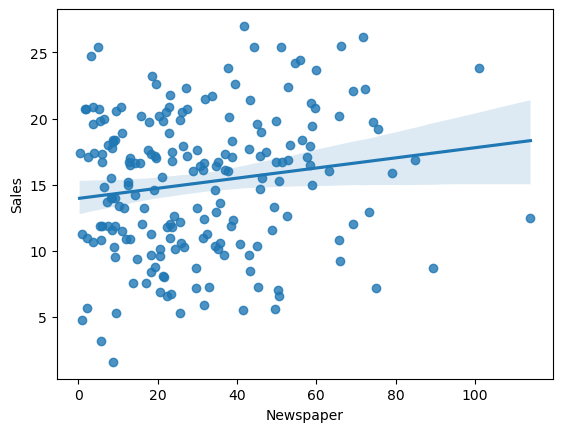

In [11]:
sns.regplot(data=advertising, x = "Newspaper", y = "Sales")

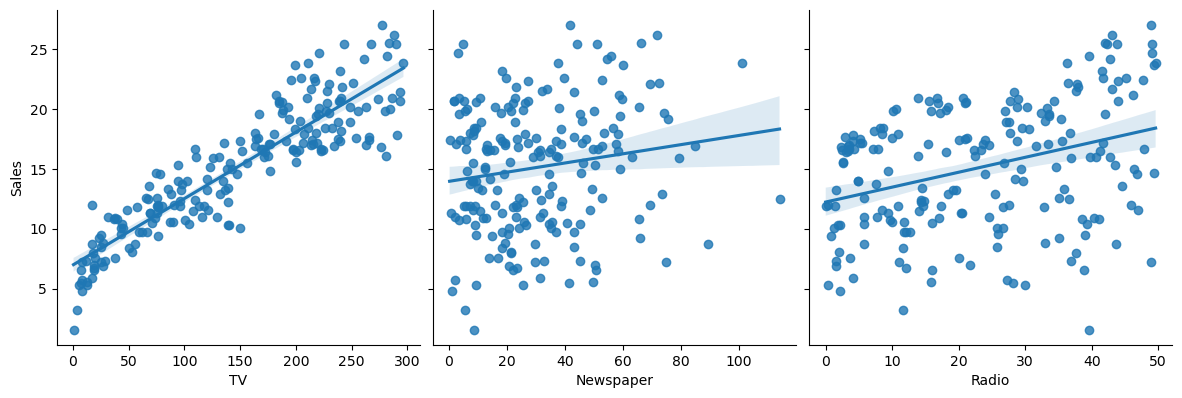

In [12]:
#to view multiple plots
#by default it takes scatter plot
sns.pairplot(advertising, x_vars=['TV','Newspaper','Radio'], y_vars='Sales', size = 4, aspect=1, kind= 'reg')
plt.show()

In [13]:
#to check the co-relation
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


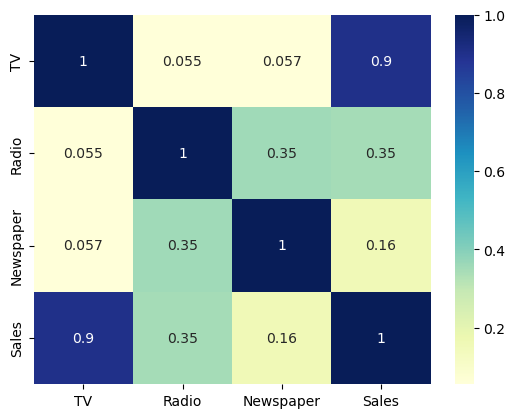

In [14]:
#heatmap
#annot is annotations
#cmap-we have to give colours we like
sns.heatmap(advertising.corr(), cmap='YlGnBu', annot=True)
plt.show()

# step 3: performing Simple Linear Regression
y = mx + c
 
In out Case:
y = c + m1 * TV

We can build a linear regression model using statsmodel and sklearn. 
statsmodel and sklearn are powerful and fast regression models widely used.

General steps to build a model:
1) create x and y
2) create train and test sets(70,30),(80,20),(60,40)
3) Train/Build model using training set(to learn the coeff)
4) Evaluate your model using(training set, testing set) 

In [15]:
x = advertising['TV']
y = advertising['Sales']

We will split the data
70 and 30 
we have 200 data points so 70 of 200 will be 140 which is training data
and 30 of 200 is 60 which is testing data

In [16]:
#Train-test split 

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [17]:
print(x_train.shape)
print(x_test.shape)

(140,)
(60,)


In [18]:
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [19]:
x_test.head()

126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
Name: TV, dtype: float64

Building a Linear Model
you first need to import statsmodel.api library using which you'll perform the linear regression

In [20]:
import statsmodels.api as sm

In [21]:
# Add a constant to get an intercept
x_train_sm = sm.add_constant(x_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

In [22]:
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [23]:
x_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [24]:
# print the parameters, i.e. the intercept and the slope of the regression line
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [25]:
# Performing a summary operation lists out all the differet parameters of the records
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           1.52e-52
Time:                        16:51:40   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

#Looking at some key  statistics from the summary

The values we are concerned with are -
1. The coeff and significance
2. R-squared
3. F Statistic and its significance

The fit is significant. Let's visualise how well the model fit the data.
sales = 6.948 + 0.054 * TV

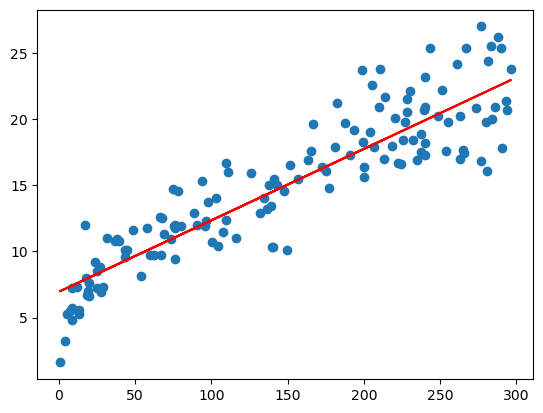

In [26]:
# r is just a red line to make line stand out
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948+0.054*x_train, 'r')
plt.show()

# Step 4: Residual analysis
To validate assumptions of the model, and hence the reliability for inference

Distributed of the error terms
We need to check if the error terms are also normally distributed(which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [27]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

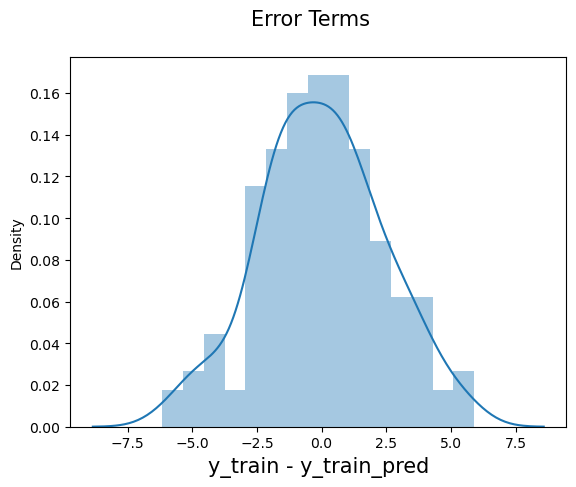

In [28]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

# step 5: predictions on data test set

In [29]:
# Add a constant to X_test
x_test_sm = sm.add_constant(x_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(x_test_sm)

In [30]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [32]:
# looking at the RMSE
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966233

In [33]:
# checking the R_squared on the test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245658

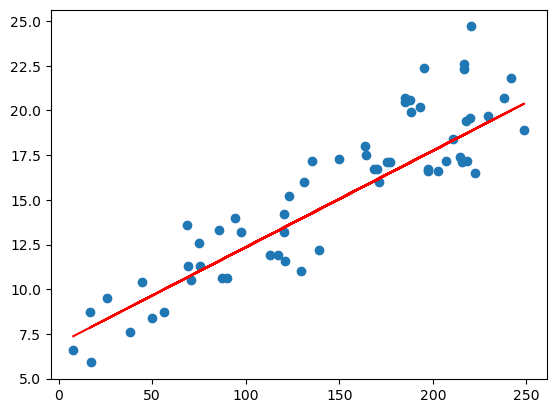

In [34]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.948 + 0.054 * x_test, 'r')
plt.show()

# Linear Regression using 'linear_model' in 'sklearn'

In [35]:
from sklearn.model_selection import train_test_split
x_train_lm, x_test_lm, y_train_lm, y_test_lm = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [36]:
x_train_lm.shape

(140,)

In [37]:
x_train_lm = x_train_lm.values.reshape(-1,1)
x_test_lm = x_test_lm.values.reshape(-1,1)

In [38]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(x_train_lm, y_train_lm)

LinearRegression()

In [39]:
print(lm.intercept_)
print(lm.coef_)

6.9486832000013585
[0.05454575]
